Decide whether there is a significant relationship between the variables in the linear regression model of the data set faithful at 5% singificance level

In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import os
import math

In [4]:
%matplotlib inline

## Data Import

In [5]:
new = pd.read_csv('Volcano.csv')

In [6]:
new.head()

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


In [7]:
new.tail()

,eruptions,waiting
267,4.117,81
268,2.150,46
269,4.417,90
270,1.817,46
271,4.467,74


## Data Type

In [8]:
# What type of values are stored in the columns
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   eruptions  272 non-null    float64
 1   waiting    272 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 4.4 KB


## Univariate Analysis

In [9]:
# Let's look at some statistical information about our dataframe
new.describe()

,eruptions,waiting
count,272.000000,272.000000
mean,3.487783,70.897059
std,1.141371,13.594974
min,1.600000,43.000000
25%,2.162750,58.000000
50%,4.000000,76.000000
75%,4.454250,82.000000
max,5.100000,96.000000


## Identify and Treatement of Outlier

<AxesSubplot:ylabel='waiting'>

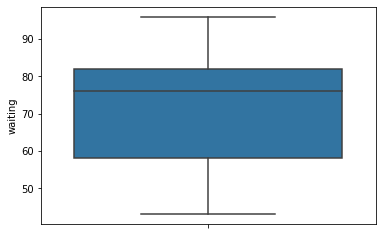

In [11]:
sns.boxplot(y = 'waiting', data = new)

<AxesSubplot:ylabel='eruptions'>

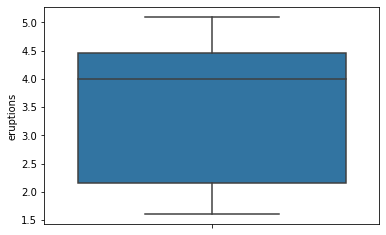

In [13]:
sns.boxplot(y = 'eruptions', data = new)

## Data Partition

In [14]:
x = new[['waiting']]
y = new[['eruptions']]

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size = 0.7, random_state = 100)

In [16]:
df = pd.concat([x_train,y_train], axis = 1)

In [17]:
df.head()

,waiting,eruptions
65,92,4.400
98,51,1.867
104,81,4.050
48,82,4.633
159,89,3.967


## Correlation Matrix

#### Bi-Variate Analysis

<AxesSubplot:title={'center':'volcano'}, xlabel='waiting', ylabel='eruptions'>

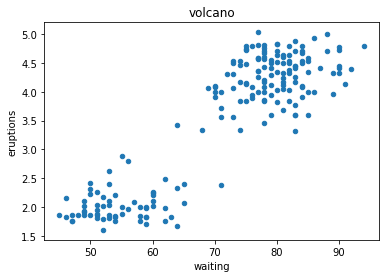

In [18]:
df.plot.scatter(x = 'waiting', y = 'eruptions', title = 'volcano')

#### Correlation Matrix

In [19]:
df.corr()

,waiting,eruptions
waiting,1.000000,0.895086
eruptions,0.895086,1.000000


<AxesSubplot:>

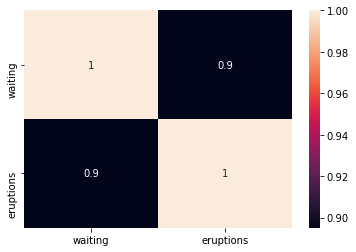

In [20]:
sns.heatmap(df.corr(),annot = True)

## Model Building

#### Hypothesis Testing

- Ho:- There is no relationship between the waiting and eruptions
- Vs
- H1:- There is relationship between the waiting and eruptions

Alpha = 5% (0.05)

In [32]:
reg = smf.ols('eruptions ~ waiting', data = df).fit()

In [24]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              eruptions   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     757.6
Date:                Tue, 04 May 2021   Prob (F-statistic):           7.37e-68
Time:                        08:51:44   Log-Likelihood:                -138.50
No. Observations:                 190   AIC:                             281.0
Df Residuals:                     188   BIC:                             287.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.9745      0.203     -9.721      0.000      -2.375      -1.574
waiting        0.0772      0.003     27.524      0.000       0.072       0.083
==============================================================================
Omnibus:                        5.987   Durbin-Watson:                   2.168
Prob(Omnibus):                  0.050   Jarque-Bera (JB):                4.177
Skew:                          -0.220   Prob(JB):                        0.124
Kurtosis:                       2.423   Cond. No.                         402.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Conclusion
- There is relationship between waiting and eruptions

## Assumptions of Model
- Linearity
- Normality
- Homoscedasicity
- Model Error has tobe independently identificaly Distributed

## Linearity

<AxesSubplot:title={'center':'Volcano'}, xlabel='waiting', ylabel='eruptions'>

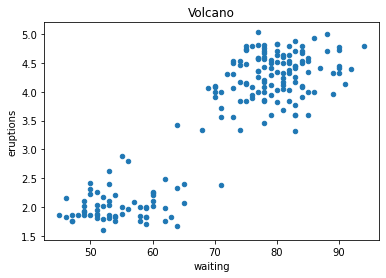

In [25]:
df.plot.scatter(x = 'waiting', y = 'eruptions', title = 'Volcano')

In [26]:
df['fitted_value'] = reg.fittedvalues
df['residual'] = reg.resid

In [27]:
df.head()

,waiting,eruptions,fitted_value,residual
65,92,4.400,5.123585,-0.723585
98,51,1.867,1.960303,-0.093303
104,81,4.050,4.274900,-0.224900
48,82,4.633,4.352053,0.280947
159,89,3.967,4.892126,-0.925126


In [28]:
y = -1.9745 + 0.0772 * 92
y

5.1279

## Homoscedasicity

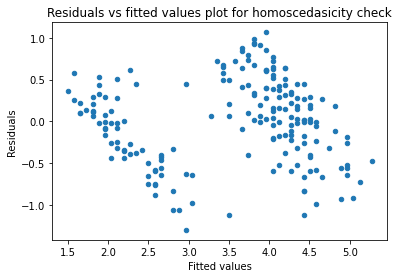

In [29]:
p = df.plot.scatter(x = 'fitted_value', y = 'residual')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
p = plt.title('Residuals vs fitted values plot for homoscedasicity check')
plt.show()

## Normality

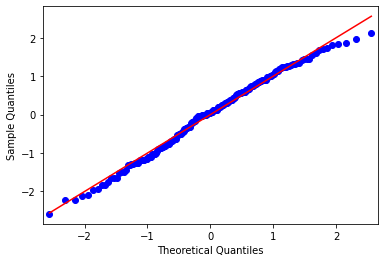

In [34]:
fig = sm.qqplot(df['residual'], fit = True, line = 's')
# s indicates standardized lines
plt.show()

## Model Error are IID

/home/eshaanjoshi/.local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


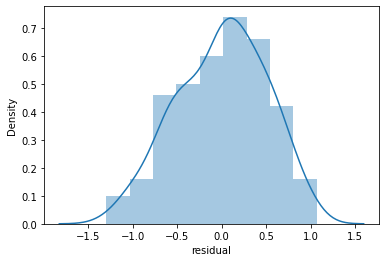

In [35]:
ax = sns.distplot(df.residual)

## Prediction on Test Data (unseen data)

In [36]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              eruptions   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     757.6
Date:                Tue, 04 May 2021   Prob (F-statistic):           7.37e-68
Time:                        09:13:49   Log-Likelihood:                -138.50
No. Observations:                 190   AIC:                             281.0
Df Residuals:                     188   BIC:                             287.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.9745      0.203     -9.721      0.000      -2.375      -1.574
waiting        0.0772      0.003     27.524      0.000       0.072       0.083
==============================================================================
Omnibus:                        5.987   Durbin-Watson:                   2.168
Prob(Omnibus):                  0.050   Jarque-Bera (JB):                4.177
Skew:                          -0.220   Prob(JB):                        0.124
Kurtosis:                       2.423   Cond. No.                         402.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
y = -1.9745+0.0772*80
y

4.2015

In [39]:
test = pd.concat([x_test,y_test],axis = 1)
test.head()

,waiting,eruptions
59,81,4.317
139,79,3.733
219,76,4.150
134,46,1.833
189,55,2.183


In [40]:
test['Predicted'] = reg.predict(test)
test.head()

,waiting,eruptions,Predicted
59,81,4.317,4.274900
139,79,3.733,4.120594
219,76,4.150,3.889134
134,46,1.833,1.574537
189,55,2.183,2.268916


## MSE and MAE and RMSE for evaluation of Model on train data

In [43]:
# Calculate the mean squared error
model_mse = mean_squared_error(df['eruptions'], df['fitted_value'])

In [44]:
# Calculate the root mean squared error
model_rmse = math.sqrt(model_mse)

In [45]:
print('RMSE{:.3}'.format(model_rmse))

RMSE0.502


## MSE and MAE and RMSE for evaluation on test data

In [46]:
# Calculate the mean squared error
model_mse = mean_squared_error(test['eruptions'], test['Predicted'])

In [47]:
# Calculate the root mean squared error
model_rmse = math.sqrt(model_mse)

In [48]:
print('RMSE{:.3}'.format(model_rmse))

RMSE0.48


# Finish